# Explore here

In [3]:
!pip install spotipy
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [16]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [26]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# Configurar conexión sotipy
conexion = spotipy.Spotify(auth_manager = SpotifyClientCredentials(
    client_id = client_id,
    client_secret = client_secret))

In [40]:
# Obtenemos el ID del artista "El Vega Life"
artist_id= '4x3Vb1a9yggcqEuRljiLeB'
#Obtenemos las mejores canciones del artista y convertimos la duración
response = conexion.artist_top_tracks('4x3Vb1a9yggcqEuRljiLeB')
if response:
    tracks = response["tracks"]
    tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

ReadTimeout: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)

In [39]:
#Creamos el dataframe de las canciones y lo ordenamos por popularidad descendente
df_tracks = pd.DataFrame.from_records(tracks)
df_tracks.sort_values(['popularity'], ascending=False,inplace = True)
df_tracks.head(10)

,duration_ms,name,popularity
0,3.469133,Amo la Vida,46
1,3.695983,Pa Vivirla,41
2,3.348300,Mi Paraíso,40
3,3.732717,Sol y Mar,35
4,4.680150,Estoy Enamorao,34
5,3.080200,Voy a Besarte,33
6,3.179917,Estamos Happy,30
7,3.781583,De Canarias Pa' La Habana,29
8,3.719633,CUANDO VUELVAS,28
9,3.622433,Libre (feat. El Vega Life),26


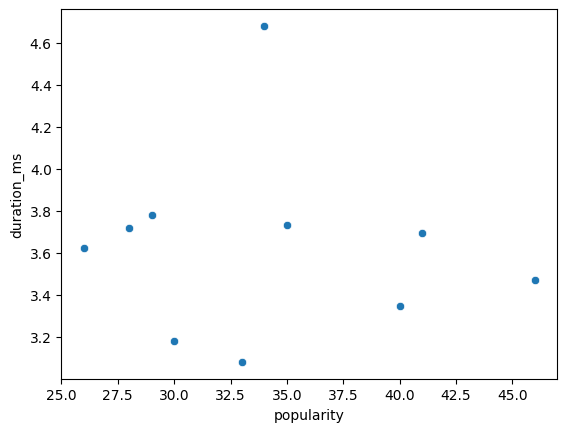

In [33]:
# Pintamos la gráfica para ver si hay relación entre popularidad y duración de la canción.

scatter_plot = sns.scatterplot(data = df_tracks, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()

Según gŕafico anterior, vemos que no existe relación directa entre la popularidad y la duración de la canción.